# Hamiltonain Monte Carlo

The `infer` package provedes Hamiltonain Monte Carlo(HMC) as a sampleing method. 

Let start with the inital imports

In [2]:
from borch.borch.model import RandomVariable, Model, PointMassGuide
import torch.distributions as dist

import matplotlib.pyplot as plt
from borch.utils.torch.tensor_utils import detach_tensor_dict
from borch.borch.utility.model_conversion import model_to_neg_log_prob_closure
from borch.infer.hmc import hmc_step

In this example we are going to fit a `Gamma` and a `Noraml` distribution, where the model is written using borch. 

In [3]:
def model(latent):
    latent.weight1 = RandomVariable(dist.Gamma(.5,.5/2))
    latent.weight2 = RandomVariable(dist.Normal(loc=1, scale=2))

In order to use hmc from borch.infer, the log_joint should be proved as a clousure. I.e. a function or python callable that takes no arguemnts. The parameters used for the hmc also needs to be in the unconstaind space, this is easy to do with borch.

In [4]:
latent = Model()
trace = PointMassGuide()
latent.set_guide(trace)

def model_call():
    model(latent)

closure = model_to_neg_log_prob_closure(model_call, latent)

In order to call hmc, parameters needs to be provided as a list, so in order to get them for a borch model one has to run the closure once to get them.

In [5]:
closure() 

tensor(-3.8148)

In [6]:

step_size = .1
samples = {}
for ii in range(1000):
    parameters = [val for val in trace.parameters.values()]
    
    accept_prob = hmc_step(epsilon=step_size, L=25, parameters=parameters, closure=closure)

    trace.save_state_as_sample()
    samples[ii] = detach_tensor_dict(latent._random_variables)



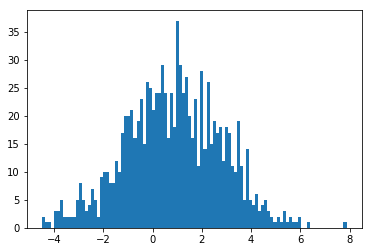

In [7]:
plt.hist([samp['weight2'] for samp in samples.values()], bins=100)
plt.show()